In [2]:
import pywt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

La compresión de imágenes por wavelets es un proceso que utiliza la transformada wavelet discreta 2D para descomponer una imagen en diferentes frecuencias y direcciones. La transformada wavelet discreta 2D se realiza utilizando una familia de wavelets, como `haar`, `db1`, `sym2` o `coif5`. Los coeficientes resultantes se comprimen mediante un umbral suave y se utilizan para reconstruir la imagen comprimida.

El parámetro `wavelet_family` se utiliza para especificar la familia de wavelets a utilizar. Algunas familias populares incluyen `haar`, `db1`, `sym2` y `coif5`. El parámetro `threshold` se utiliza para establecer el valor del umbral suave utilizado para comprimir los coeficientes wavelet. Los coeficientes cuyo valor absoluto es menor que el umbral se establecen en cero, mientras que los coeficientes cuyo valor absoluto es mayor que el umbral se mantienen sin cambios. El parámetro `filter` se utiliza para especificar el tipo de filtro utilizado para la descomposición wavelet.

El proceso de compresión de imágenes por wavelets implica los siguientes pasos:

1. Cargar la imagen original.
2. Realizar una transformada wavelet discreta 2D en la imagen utilizando una familia de wavelets especificada.
3. Comprimir los coeficientes resultantes mediante un umbral suave.
4. Reconstruir la imagen comprimida utilizando los coeficientes comprimidos.
5. Visualizar la imagen original y la imagen comprimida.

La compresión de imágenes por wavelets puede ser utilizada para reducir el tamaño de las imágenes digitales sin perder demasiada información visual. Sin embargo, es importante tener en cuenta que la calidad de la imagen comprimida depende del valor del umbral suave utilizado y de la familia de wavelets seleccionada.

(1) Uso de la Transformada de Wavelet para la compresión de imágenes .... http://lcr.uns.edu.ar/fvc/NotasDeAplicacion/FVC-Gonzalo%20D%20Acosta.pdf.
(2) Compresión de imágenes con Wavelets y Multiwavelets - Redalyc. https://www.redalyc.org/articulo.oa?id=498850160008.
(3) Tratamiento de imágenes digitales mediante wavelets. http://personales.upv.es/aperis/wavelets/imagenes/indice.htm.
(4) Compresión de imágenes Haar Wavelet - Studocu. https://www.studocu.com/es-mx/document/universidad-autonoma-de-coahuila/algebra-lineal/compresion-de-imagenes-haar-wavelet/3068260.
(5) Compresión de Imágenes Fijas utilizando la Trasformada Wavelet - CORE. https://core.ac.uk/download/pdf/15780665.pdf.
(6) Single-level 2-D discrete wavelet transform - MATLAB dwt2 - MathWorks. https://www.mathworks.com/help/wavelet/ref/dwt2.html.
(7) Filters (Wavelet): Thresholding - MIPAV - National Institutes of Health. https://mipav.cit.nih.gov/pubwiki/index.php/Filters_%28Wavelet%29:_Thresholding.
(8) python - How to find threshold value and which wavelet family to use .... https://stackoverflow.com/questions/59886413/how-to-find-threshold-value-and-which-wavelet-family-to-use-for-low-pass-filter.

In [4]:
def compress_image(image_path, wavelet_family):
    # Load the image
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Decompose the image using the specified wavelet family
    coeffs = pywt.dwt2(image_array, wavelet_family)
    # Discard some of the coefficients to compress the image
    compressed_coeffs = [pywt.threshold(i, value=5, mode='garrote') for i in coeffs] #th dfault value = 0.1, mode dfault value = soft
    # Reconstruct the compressed image
    compressed_image = pywt.idwt2(compressed_coeffs, wavelet_family)
    # Convert the numpy array back to an image
    compressed_image = Image.fromarray(np.uint8(compressed_image))
    return compressed_image

# Example usage:
image_path = 'data/Lena.png'
wavelet_family = 'haar'
compressed_image = compress_image(image_path, wavelet_family)
compressed_image.show()
compressed_image.save("./data/Lena_comp_haar_th_5_mode_garrote_filter_LoD.png","PNG")

Haar wavelet

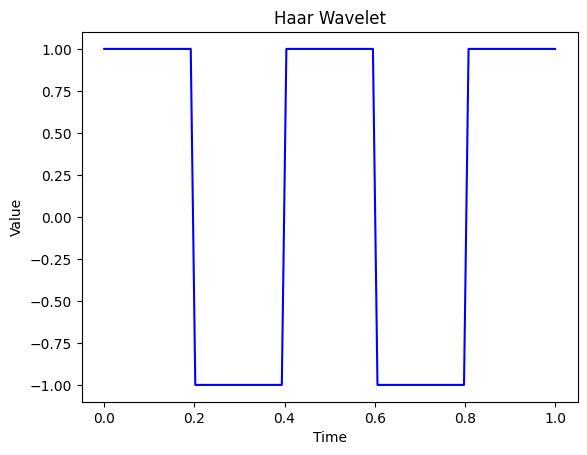

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(0, 1, 100)

# Create an empty wavelet vector
haar_wavelet = np.zeros_like(x)

# Define the number of alternating intervals
num_intervals = 5

# Calculate the length of each alternating interval
interval_length = len(x) // num_intervals

# Fill the wavelet vector with +1 and -1 values in alternating intervals
for i in range(num_intervals):
    start = i * interval_length
    end = (i + 1) * interval_length
    if i % 2 == 0:
        haar_wavelet[start:end] = 1
    else:
        haar_wavelet[start:end] = -1

# Plot the Haar wavelet
plt.plot(x, haar_wavelet, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Haar Wavelet')
plt.show()

Mexican Hat (Ricker) Wavelet

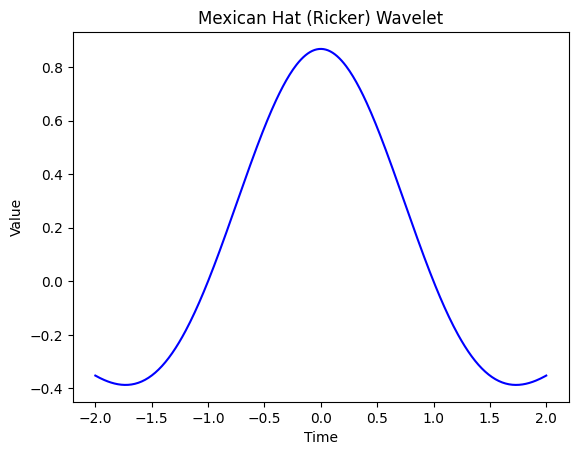

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define the Mexican Hat (Ricker) wavelet function
def mexican_hat_wavelet(x):
    sigma = 1.0  # Width of the Gaussian component
    return (2 / (np.sqrt(3 * sigma) * (np.pi ** 0.25)) *
            (1 - (x ** 2) / (sigma ** 2)) * np.exp(-x ** 2 / (2 * sigma ** 2)))

# Compute the Mexican Hat wavelet for the time vector
mexican_hat = mexican_hat_wavelet(x)

# Plot the Mexican Hat (Ricker) wavelet
plt.plot(x, mexican_hat, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mexican Hat (Ricker) Wavelet')
plt.show()



Symlet Wavelet

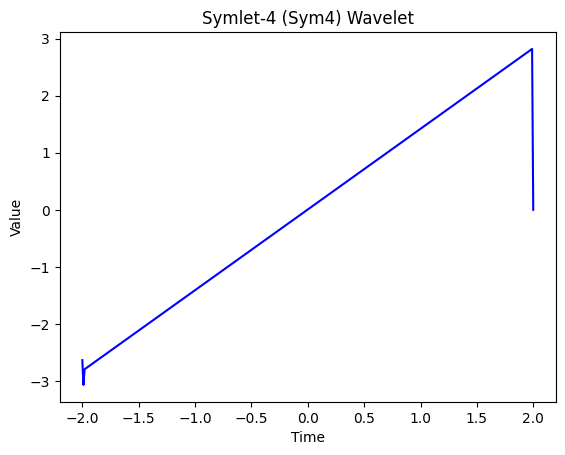

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define the Symlet-4 (Sym4) wavelet coefficients
sym4_coefficients = [0.48296, 0.8365, 0.22414, -0.12940]

# Function to compute the Symlet-4 wavelet
def compute_sym4_wavelet(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)-1):
        sum_val = 0
        for j in range(n):
            k = i - j + 1
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Compute the Symlet-4 wavelet for the time vector
sym4_wavelet = compute_sym4_wavelet(x, sym4_coefficients)

# Plot the Symlet-4 (Sym4) wavelet
plt.plot(x, sym4_wavelet, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Symlet-4 (Sym4) Wavelet')
plt.show()


Gabor Wavelet

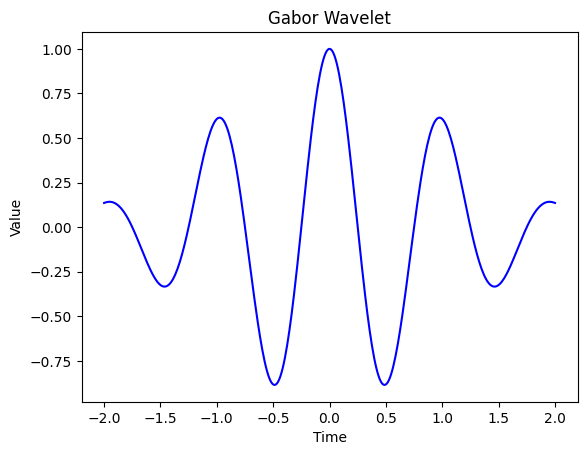

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define Gabor wavelet parameters
sigma = 1.0  # Width of the Gaussian component
f = 1.0  # Frequency of the sinusoidal component
phi = 0.0  # Phase of the sinusoidal component

# Function to compute the Gabor wavelet
def gabor_wavelet(x, sigma, f, phi):
    gauss_part = np.exp(-x**2 / (2 * sigma**2))
    sinus_part = np.cos(2 * np.pi * f * x + phi)
    return gauss_part * sinus_part

# Compute the Gabor wavelet for the time vector
gabor_wavelet_values = gabor_wavelet(x, sigma, f, phi)

# Plot the Gabor wavelet
plt.plot(x, gabor_wavelet_values, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gabor Wavelet')
plt.show()


Biorthogonal Wavelet

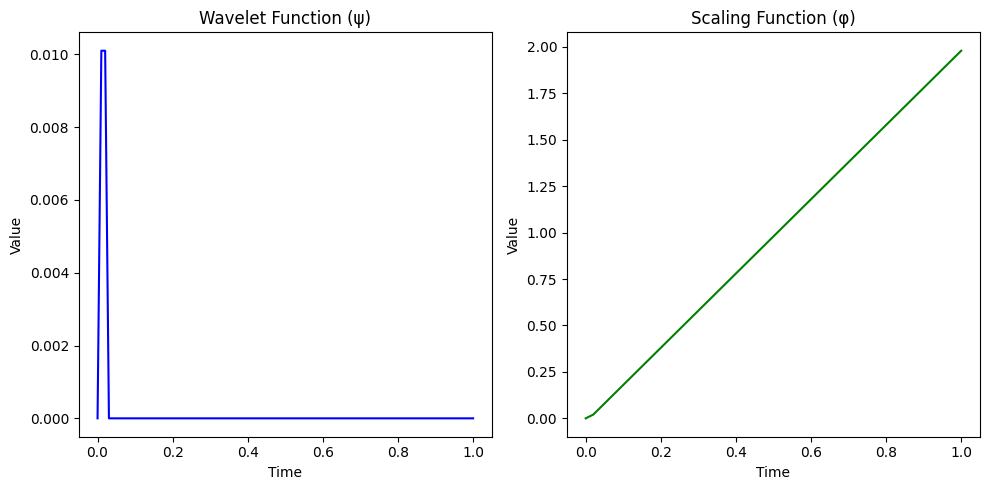

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(0, 1, 100)

# Define the coefficients for the wavelet (ψ) and scaling (φ) functions
wavelet_coefficients = [1, -1, -1, 1]
scaling_coefficients = [1, 1]

# Function to compute the wavelet function (ψ)
def compute_wavelet(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)):
        sum_val = 0
        for j in range(n):
            k = i - j
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Function to compute the scaling function (φ)
def compute_scaling(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)):
        sum_val = 0
        for j in range(n):
            k = i - 2 * j
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Compute the wavelet (ψ) and scaling (φ) functions for the time vector
wavelet_function = compute_wavelet(x, wavelet_coefficients)
scaling_function = compute_scaling(x, scaling_coefficients)

# Plot the wavelet (ψ) and scaling (φ) functions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, wavelet_function, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Wavelet Function (ψ)')

plt.subplot(1, 2, 2)
plt.plot(x, scaling_function, color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Scaling Function (φ)')

plt.tight_layout()
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


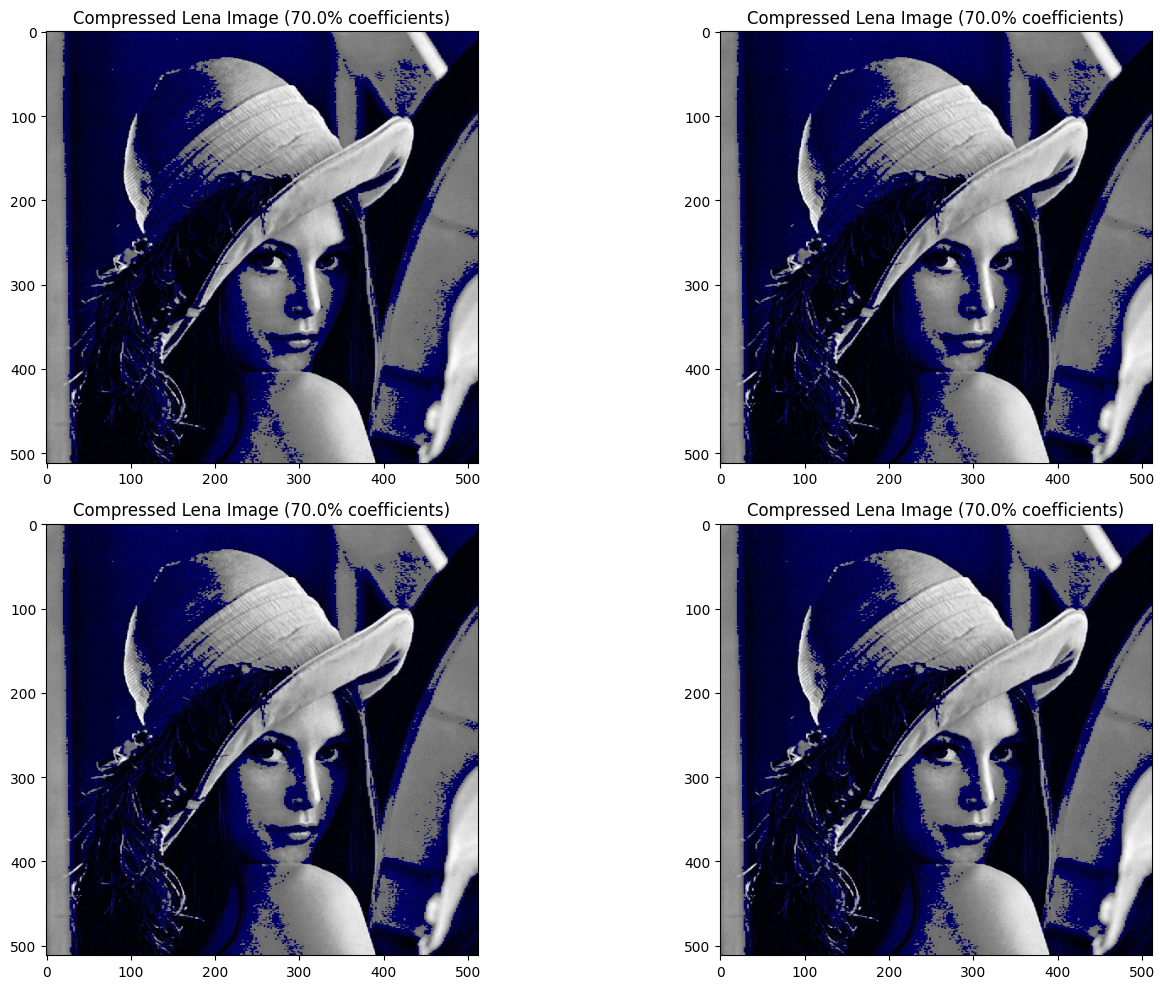

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt

# Load the Lena image
lena_image = mpimg.imread('./data/Lena.png')  # Replace 'lena.png' with the path to your image

# Define the compression ratio (e.g., keep only 50% of coefficients)
compression_ratio = 0.7

# Convert the Lena image to grayscale if it's in color
if lena_image.shape[-1] == 3:
    lena_image = np.mean(lena_image, axis=-1)

# Perform the 2D Discrete Wavelet Transform (DWT)
coeffs = pywt.dwt2(lena_image, 'haar')

# Extract the LL (low-frequency) coefficient
cA, (cH, cV, cD) = coeffs
compressed_cA = cA
compressed_cH = cH
compressed_cV = cV
compressed_cD = cD

# Calculate the threshold for compression
thresholdA = np.percentile(np.abs(compressed_cA), (1 - compression_ratio) * 100)
thresholdH = np.percentile(np.abs(compressed_cH), (1 - compression_ratio) * 100)
thresholdV = np.percentile(np.abs(compressed_cV), (1 - compression_ratio) * 100)
thresholdD = np.percentile(np.abs(compressed_cD), (1 - compression_ratio) * 100)

# Set coefficients below the threshold to zero
compressed_cA[np.abs(compressed_cA) < thresholdA] = 0
compressed_cH[np.abs(compressed_cH) < thresholdH] = 0
compressed_cV[np.abs(compressed_cV) < thresholdV] = 0
compressed_cD[np.abs(compressed_cD) < thresholdD] = 0

# Reconstruct the compressed image
compressed_image_cA = pywt.idwt2((compressed_cA, (cH, cV, cD)), 'haar')
compressed_image_cH = pywt.idwt2((cA, (compressed_cH, cV, cD)), 'haar')
compressed_image_cV = pywt.idwt2((cA, (cH, compressed_cV, cD)), 'haar')
compressed_image_cD = pywt.idwt2((cA, (cH, cV, compressed_cD)), 'haar')

# Plot the original and compressed images
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(compressed_image_cA, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 2)
plt.imshow(compressed_image_cH, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 3)
plt.imshow(compressed_image_cV, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 4)
plt.imshow(compressed_image_cD, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.tight_layout()



In [31]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


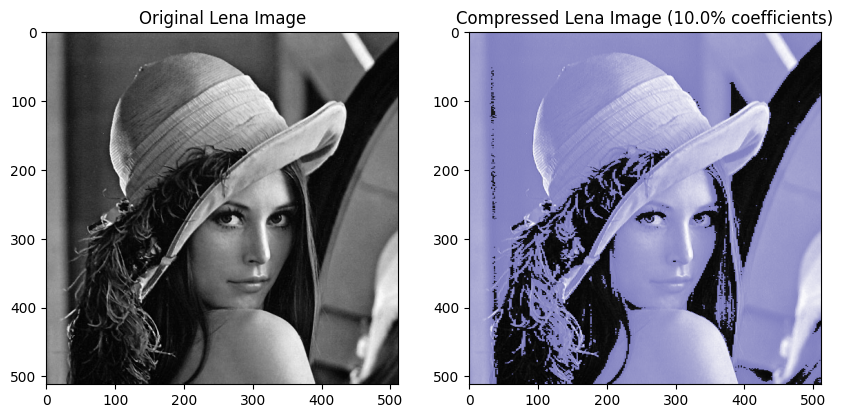

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt

# Load the Lena image
lena_image = mpimg.imread('./data/Lena.png')  # Replace 'lena.png' with the path to your image

# Define the compression ratio (e.g., keep only 50% of coefficients)
compression_ratio = 0.1

# Convert the Lena image to grayscale if it's in color
if lena_image.shape[-1] == 3:
    lena_image = np.mean(lena_image, axis=-1)

# Perform the 2D Discrete Wavelet Transform (DWT)
coeffs = pywt.dwt2(lena_image, 'haar')

# Extract the LL (low-frequency) coefficient
cA, (cH, cV, cD) = coeffs
compressed_cV = cV

# Calculate the threshold for compression
threshold = np.percentile(np.abs(compressed_cV), (1 - compression_ratio) * 100)

# Set coefficients below the threshold to zero
compressed_cV[np.abs(compressed_cV) < threshold] = 0

# Reconstruct the compressed image
compressed_image = pywt.idwt2((cA, (cH, compressed_cV, cD)), 'haar')

# Plot the original and compressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_image, cmap='gray')
plt.title('Original Lena Image')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')
plt.show()

In [ ]:
h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    cA = np.convolve(data, h0, mode='same')
    cD = np.convolve(data, h1, mode='same')
        

    return cA, cD

def inverse_haar_wavelet(cA, cD):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    data_approx = np.convolve(cA, h0, mode='same')
    data_detail = np.convolve(cD, h1, mode='same')

    return data_approx + data_detail

In [ ]:
def wavelet_compress(image_path, compression_ratio = 0.1, wavelet_family = 'daubechies_1'):

    # Carga de la imagen en escala de grises
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convolución con la wavelet
    if wavelet_family == 'daubechies_1':
        flattened_image = original_image.flatten()
        cA, cD = daubechies_wavelet(flattened_image)

    elif wavelet_family == 'haar':
        flattened_image = original_image.flatten()
        cA, cD = haar_wavelet(flattened_image)

    elif wavelet_family == 'coiflet_1':
        flattened_image = original_image.flatten()
        cA, cD = coiflet_wavelet(flattened_image)

    else:
        raise Exception(f'La familia de wavelets {wavelet_family} no está implementada.')
    
    # Compresión: eliminamos coeficientes por debajo del umbral
    threshold = compression_ratio * np.max(np.abs(cD))
    cD_thresholded = np.where(np.abs(cD) < threshold, 0, cD)

    # Transformada inversa
    if wavelet_family == 'daubechies_1':
        compressed_image_flat = inverse_daubechies_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'haar':
        compressed_image_flat = inverse_haar_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'coiflet_1':
        compressed_image_flat = inverse_coiflet_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)
    
    # Guaradado de la imagen comprimida
    output_image_path = f'./data/Lena_{wavelet_family}.png'
    cv2.imwrite(output_image_path, compressed_image.astype(np.uint8))

    # Representación
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()

    return compressed_image

# Example usage
input_image_path = './data/Lena.png'
wavelet_family = 'coiflet_1'
compression_ratio = 0.1  # You can adjust this value based on your desired compression ratio

compressed_image = wavelet_compress(input_image_path, compression_ratio, wavelet_family)